In [2]:
import os
import torch
from skimage import io, measure
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread, imsave

import warnings
warnings.filterwarnings('ignore')

import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, EarlyStopping
import torch.optim as optim
import torch.utils.data as dt


import sys
sys.path.append('/mnt/c/Users/ankit/Desktop/Msc AIML/msc-project/GAP/gap')
from GAP_UNET_ResBlock import UN
from BinomDataset import BinomDataset
from inference import sample_image

In [3]:
CHECKPOINT_PATH = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/checkpoints/models/'
name = 'm40tom5-256x256'

model_1 = UN.load_from_checkpoint(os.path.join(CHECKPOINT_PATH, name)+'.ckpt').to('cuda')

In [5]:
data_low_res= imread('/mnt/c/Users/ankit/Desktop/Msc AIML/Data/convallaria/testData.tif') 
data_high_res= imread('/mnt/c/Users/ankit/Desktop/Msc AIML/Data/convallaria/testDataGT.tif') 

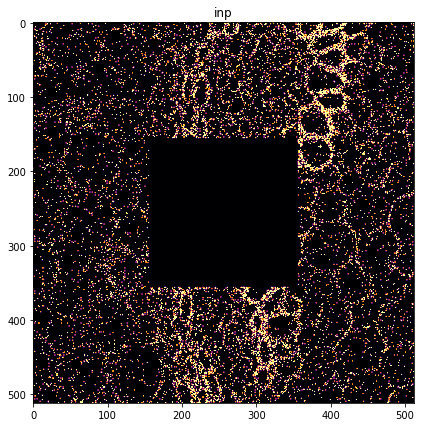

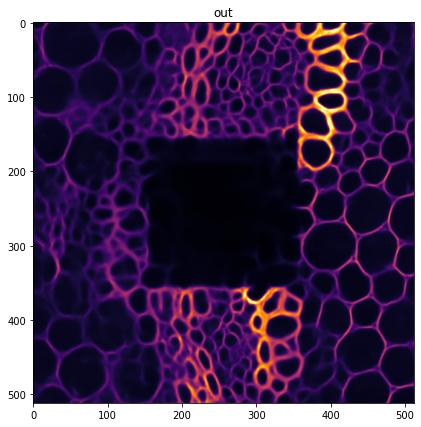

In [19]:
inp = data_low_res[0]
square_size = 200
height = width = 512
tl_x = (width - square_size) // 2
tl_y = (height - square_size) // 2
br_x = tl_x + square_size
br_y = tl_y + square_size

masked_inp = inp.copy()
masked_inp[tl_y:br_y, tl_x:br_x] = 0
# plt.imshow(masked_inp)

inpT = torch.from_numpy(masked_inp.astype(np.float32)).to('cuda')
out = torch.exp(model_1(inpT[None,None,...]).detach().cpu())
out = inp.sum() * out / out.sum()
    
masked_inp = masked_inp/masked_inp.mean()
out = out/out.mean()
vmax = np.percentile(out,99.9)
    
plt.figure(figsize=(7,7))
plt.imshow(masked_inp,vmin = 0, vmax = vmax, cmap = "inferno")
plt.title('inp')
plt.show()
    
plt.figure(figsize=(7,7))
plt.imshow(out[0,0],vmin = 0,vmax = vmax, cmap = "inferno")
plt.title('out')
plt.show()

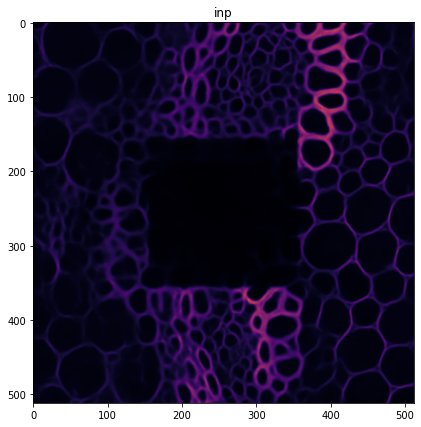

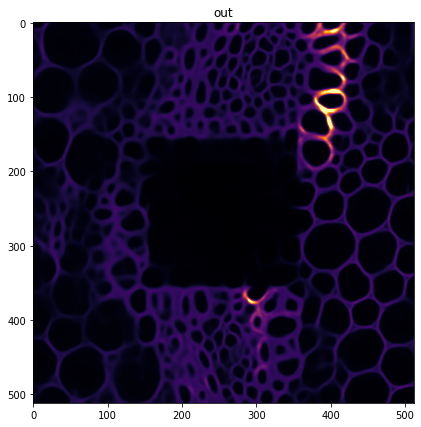

In [20]:
masked_inp = out[0,0]
inpT = masked_inp.to('cuda')
out = torch.exp(model_1(inpT[None,None,...]).detach().cpu())
out = inp.sum() * out / out.sum()
    
masked_inp = masked_inp/masked_inp.mean()
out = out/out.mean()
vmax = np.percentile(out,99.9)
    
plt.figure(figsize=(7,7))
plt.imshow(masked_inp,vmin = 0, vmax = vmax, cmap = "inferno")
plt.title('inp')
plt.show()
    
plt.figure(figsize=(7,7))
plt.imshow(out[0,0],vmin = 0,vmax = vmax, cmap = "inferno")
plt.title('out')
plt.show()

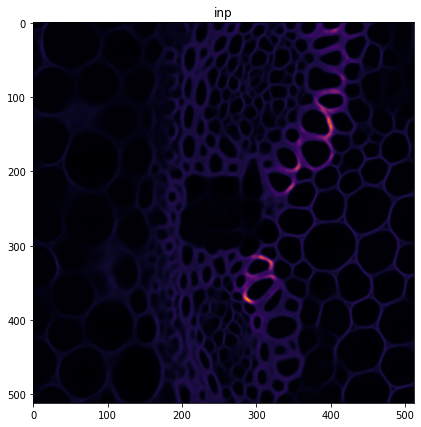

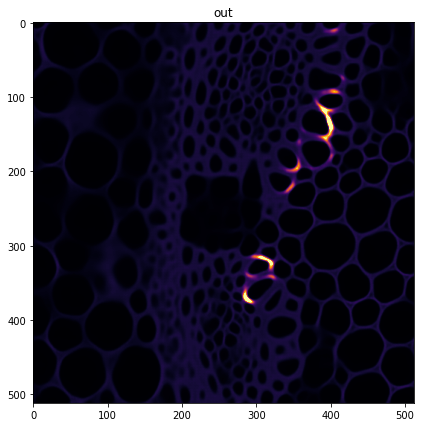

In [15]:
masked_inp = out[0,0]
inpT = masked_inp.to('cuda')
out = torch.exp(model_1(inpT[None,None,...]).detach().cpu())
out = inp.sum() * out / out.sum()
    
masked_inp = masked_inp/masked_inp.mean()
out = out/out.mean()
vmax = np.percentile(out,99.9)
    
plt.figure(figsize=(7,7))
plt.imshow(masked_inp,vmin = 0, vmax = vmax, cmap = "inferno")
plt.title('inp')
plt.show()
    
plt.figure(figsize=(7,7))
plt.imshow(out[0,0],vmin = 0,vmax = vmax, cmap = "inferno")
plt.title('out')
plt.show()

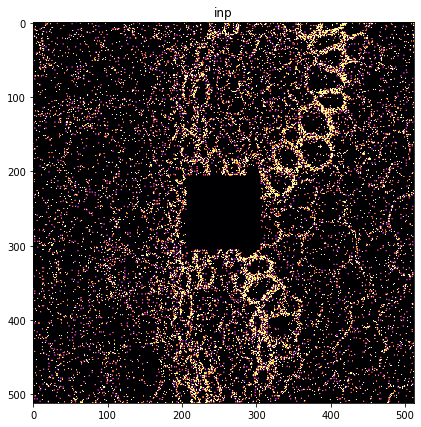

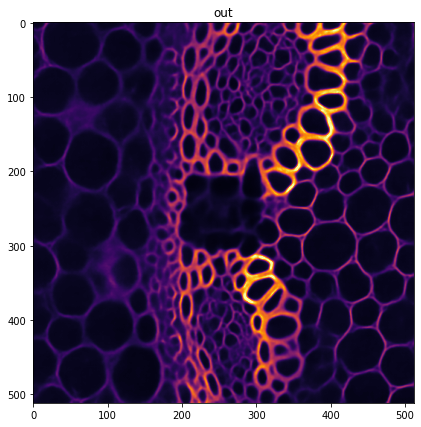

In [7]:
inp = data_low_res[0]
square_size = 100
height = width = 512
tl_x = (width - square_size) // 2
tl_y = (height - square_size) // 2
br_x = tl_x + square_size
br_y = tl_y + square_size

masked_inp = inp.copy()
masked_inp[tl_y:br_y, tl_x:br_x] = 0
# plt.imshow(masked_inp)

inpT = torch.from_numpy(masked_inp.astype(np.float32)).to('cuda')
out = torch.exp(model_1(inpT[None,None,...]).detach().cpu())
out = inp.sum() * out / out.sum()
    
masked_inp = masked_inp/masked_inp.mean()
out = out/out.mean()
vmax = np.percentile(out,99.9)
    
plt.figure(figsize=(7,7))
plt.imshow(masked_inp,vmin = 0, vmax = vmax, cmap = "inferno")
plt.title('inp')
plt.show()
    
plt.figure(figsize=(7,7))
plt.imshow(out[0,0],vmin = 0,vmax = vmax, cmap = "inferno")
plt.title('out')
plt.show()